In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [36]:
#Reading input data

#dataset with nulls dropped

dropped = pd.read_csv('final-dropped.csv')

In [37]:
#Extracting inputs and outputs
#Predicting only PM25 now. Need to figure out how to predict multiple values
y = dropped[['PM25']]
X = dropped.drop(['PM25'], axis=1)

In [38]:
#Splitting into test and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [39]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [40]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [42]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.36957216414011956

In [43]:
from math import sqrt
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Root mean squared error: 7.98
Mean absolute error: 5.48
R-squared: 0.37


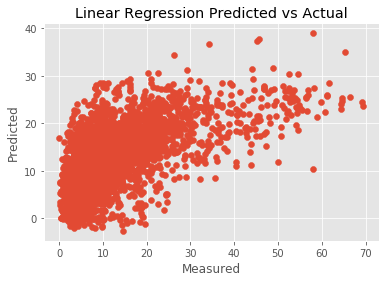

In [44]:
#plots to be moved to data visualisation notebook
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [45]:
#Neural Net Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [46]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.5888791298873319

In [48]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [50]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 6.44
Mean absolute error: 4.26
R-squared: 0.59


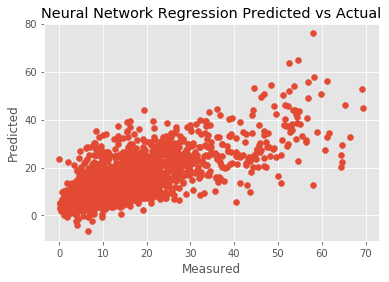

In [51]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [52]:
#XGBoost

from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [53]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [54]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.6519210505200361

In [55]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [56]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 5.93


In [57]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.36957216414011956
Neural network regression score:  0.5888791298873319
XGBoost score: 0.6519210505200361


RMSE:
Linear regression RMSE: 7.98
Neural network RMSE: 6.44
XGBoost RMSE: 5.93
